## You need to have xlwings installed 
## Also you need to config the excel file,
## if xlwings option is not enable
### See file excel_configuration.txt 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlwings as xw
from xlwings import constants as xl_const
from xlwings.constants import LineStyle

In [2]:
# read the demo df
df = pd.read_excel('PythonCharts.xlsx')

In [3]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
def aggregate_df(df):
    """ create the aggregate df pre defined criteria """
    df = df.groupby(['sex', 'smoker']).agg({
        'total_bill': 'mean',
        'tip': 'mean',
        'size': 'mean'
    }).reset_index()
    
    # Rename the columns
    new_columns = {
        'total_bill': 'Mean Total Bill',
        'tip': 'Mean Tip',
        'size': 'Mean Size'
    }
    df = df.rename(columns=new_columns)
    return df

In [5]:
agg_df = aggregate_df(df)
agg_df.head()

,sex,smoker,Mean Total Bill,Mean Tip,Mean Size
0,Female,No,18.105185,2.773519,2.592593
1,Female,Yes,17.977879,2.931515,2.242424
2,Male,No,19.791237,3.113402,2.711340
3,Male,Yes,22.284500,3.051167,2.500000


<AxesSubplot:>

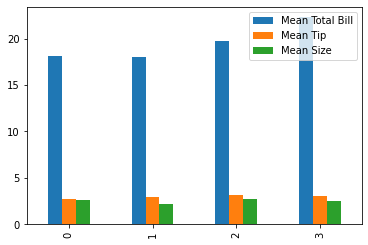

In [6]:
# Plot the agg_df
agg_df.plot(kind='bar')

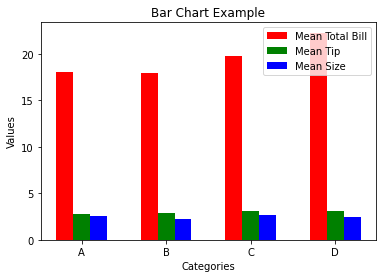

In [7]:
fig, ax = plt.subplots()

x = np.arange(len(agg_df))  # X-axis values
y1 = agg_df['Mean Total Bill']  # Values for the first bar chart
y2 = agg_df['Mean Tip']  # Values for the second bar chart
y3 = agg_df['Mean Size']  # Values for the third bar chart

ax.bar(x - 0.2, y1, width=0.2, color='red', align='center')
ax.bar(x, y2, width=0.2, color='green', align='center')
ax.bar(x + 0.2, y3, width=0.2, color='blue', align='center')

ax.set_xticks(x)
ax.set_xticklabels(['A', 'B', 'C', 'D'])
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar Chart Example')

ax.legend(['Mean Total Bill', 'Mean Tip', 'Mean Size'])

plt.show()


### Now lets created it on excel

In [8]:
def init_excel_sheet(sheet):
    """ Init the excel reader object """ 
    wk = xw.books.open('test.xlsx')
    wb = xw.Book.caller()
    return wb.sheets(sheet)

In [9]:
def read_df(sheet):
    """ Get the df from excel file"""
    df = sheet.range("A1").options(pd.DataFrame, index=False, expand='table').value
    return df
    

In [10]:
def write_df_with_style(df, sheet):
    """ Write the aggregated df to excel Add style as well """
    headers = ['j1','K1','L1','M1','N1']
    sheet["I1"].value = df
    for header in headers:
        sheet[header].font.bold = True
        sheet[header].api.HorizontalAlignment = xl_const.HAlign.xlHAlignCenter
        sheet[header].api.VerticalAlignment = xl_const.VAlign.xlVAlignCenter
    
    range_with_borders = sheet.range("I1:N5")
    # Access the underlying Excel Range object using the .api property
    excel_range = range_with_borders.api

    # Apply table borders using Excel's API
    excel_range.Borders(7).LineStyle = 1
    excel_range.Borders(7).Weight = 2
    excel_range.Borders(8).LineStyle = 1
    excel_range.Borders(8).Weight = 2
    excel_range.Borders(9).LineStyle =1
    excel_range.Borders(9).Weight = 2
    excel_range.Borders(10).LineStyle = 1
    excel_range.Borders(10).Weight = 2
    

In [11]:
def bar_chart(df, cell, sheet):
        """
        Plot a Bar Graph for selected columns.
        place: position of the chart
        """
        fig, ax = plt.subplots()

        x = np.arange(len(df))  # X-axis values
        y1 = df['Mean Total Bill']  # Values for the first bar chart
        y2 = df['Mean Tip']  # Values for the second bar chart
        y3 = df['Mean Size']  # Values for the third bar chart

        ax.bar(x - 0.2, y1, width=0.2, color='red', align='center')
        ax.bar(x, y2, width=0.2, color='green', align='center')
        ax.bar(x + 0.2, y3, width=0.2, color='blue', align='center')

        ax.set_xticks(x)
        ax.set_xticklabels(['0', '1', '2', '3'])
        ax.set_xlabel('Categories')
        ax.set_ylabel('Values')
        ax.set_title('Bar Chart Example')

        ax.legend(['Mean Total Bill', 'Mean Tip', 'Mean Size'])
        plt.title(f" Mean Total Bill, Mean Tip, Mean Size \n groupby sex and smoker and aggregated with mean\n")
        insert_picture_to_excel(sht=sheet, cell=cell, fig=fig, pic_name="Agrregation and group by example")

In [12]:
def insert_picture_to_excel(sht, cell, fig, pic_name):
    """ Insert the chart into the worksheet"""
    for picture in sht.pictures:
        if picture.name == pic_name:
            picture.delete()
    sht.pictures.add(
        fig,
        name=pic_name,
        update=True,
        left=sht.range(cell).left,
        top=sht.range(cell).top,
        height=250,
        width=400,
    )
    return None

In [13]:
def main():
    # Init the excel sheet
    sheet = init_excel_sheet('Sheet1')
    
    # Get initial df
    excel_df = read_df(sheet)
    
    # Run the aggregated function
    df_grouped_agg = aggregate_df(excel_df)
    
    # Write deata to excel
    write_df_with_style(df_grouped_agg, sheet)
    
    # Plot the chart
    bar_chart(df_grouped_agg, "I9", sheet)

In [20]:
if __name__ == '__main__':
    xw.Book("test.xlsx").set_mock_caller()
    main()